**Import Libraries**

In [80]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

**Import datasets for training and testing**

In [81]:
train_df = pd.read_csv('train.csv')
print(train_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [82]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [83]:
test_df = pd.read_csv('test.csv')
print(test_df.head())


     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [85]:
y_test = pd.read_csv('sample_submission.csv')
del y_test['Id']
print(y_test)

          SalePrice
0     169277.052498
1     187758.393989
2     183583.683570
3     179317.477511
4     150730.079977
...             ...
1454  167081.220949
1455  164788.778231
1456  219222.423400
1457  184924.279659
1458  187741.866657

[1459 rows x 1 columns]


**preprocessing on train and test data**

In [86]:
#train data
numeric_cols =train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

encoder = OneHotEncoder(drop='first', sparse=False)


#test data
numeric_cols =test_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = test_df.select_dtypes(include=['object']).columns

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = SimpleImputer(strategy='most_frequent')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

encoder = OneHotEncoder(drop='first', sparse=False)


In [90]:
# Additional features related to square footage, number of bedrooms, and number of bathrooms
#train_df['TotalRooms'] = train_df['BedroomAbvGr'] + train_df['FullBath']
#train_df['BedBathRatio'] = train_df['BedroomAbvGr'] / (train_df['FullBath'] + 1)  # Adding 1 to prevent division by zero

# Select features and target variable
X_train = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath' ]]
y_train = train_df['SalePrice']

#test_df['TotalRooms'] = test_df['BedroomAbvGr'] + test_df['FullBath']
#test_df['BedBathRatio'] = test_df['BedroomAbvGr'] / (test_df['FullBath'] + 1)  # Adding 1 to prevent division by zero
X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath',
                   ]]


# Standardize features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_reshaped)

X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)


**Apply Linear Regression model**

In [91]:
# Create a linear regression model
model = LinearRegression()

#Use the GridSearchCV technique to increase the accuracy of the model
# Define hyperparameters for Grid Search
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1, 'positive': False}


**Evaluate the model and make predictions on the test set**

In [93]:
# Evaluate the best model and make predictions on the test set
best_model = grid_search.best_estimator_
test_predictions= best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)

**Print predicted values in Excel_Sheet**

In [94]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
test_predictions= best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, test_predictions)



# Flatten the multi-dimensional array test_predictions
flattened_predictions = test_predictions.flatten()

# Create the DataFrame
predictions_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': flattened_predictions})

# Write the predictions to an Excel file
predictions_df.to_excel('predictions.xlsx', index=False)

print("Predictions saved to predictions.xlsx")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Predictions saved to predictions.xlsx


**Compare between predicted values and true values**

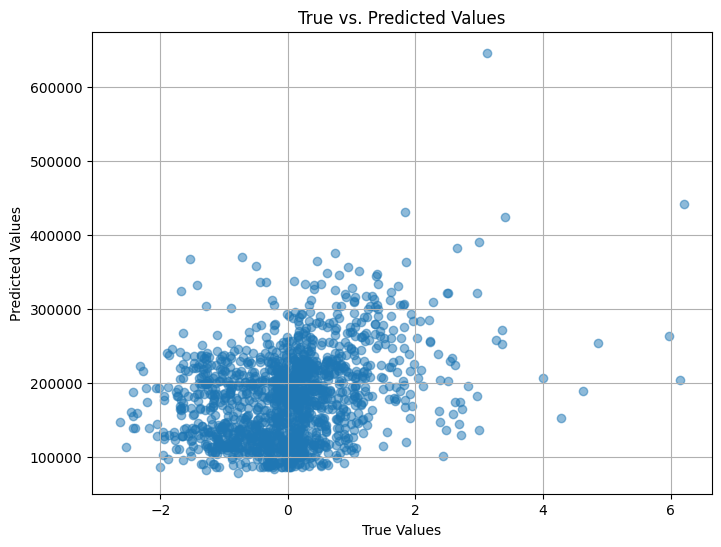

In [95]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, test_predictions, alpha=0.5)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()